# KNN algorithm (K-Nearest-Neighbors)
Suitable for small datasets upto 1000 rows

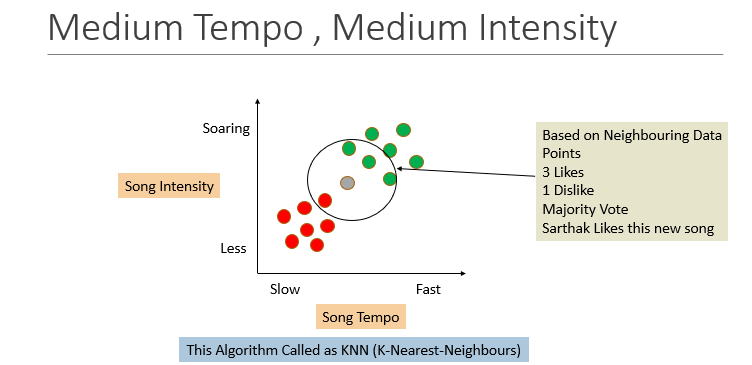

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 - Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


### Step 3 - Seperate X and Y(species)

In [7]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

### Step 4 - Preprocessing on X

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


### Step 5- Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
95,-0.173447,-0.137353,0.255985,0.007064
104,0.792668,-0.137353,1.164122,1.322752
66,-0.294211,-0.137353,0.426261,0.401770
0,-0.898033,1.012401,-1.333255,-1.308624
141,1.275726,0.092598,0.766812,1.454321


In [18]:
ytrain.head()

,species
95,versicolor
104,virginica
66,versicolor
0,setosa
141,virginica


In [19]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.309611,-0.597255,0.539778,0.007064
18,-0.173447,1.702254,-1.162979,-1.177055
117,2.241842,1.702254,1.674949,1.322752
78,0.188846,-0.367304,0.426261,0.401770
76,1.154962,-0.597255,0.596536,0.270202


In [20]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [21]:
xtrain.shape

(99, 4)

In [22]:
xtest.shape

(50, 4)

### Step 6 - Model building and tuning

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors= 40)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

In [27]:
model1.score(xtrain, ytrain)

0.8686868686868687

In [28]:
model1.score(xtest, ytest)

0.9

### Hyperparameter tuning 

In [29]:
params = {
    "n_neighbors":[4, 5, 6, 7, 8, 9, 10, 11, 12]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(estimator= knn, param_grid=params, cv = 5,scoring= "f1_macro")
gscv_knn.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1_macro')

In [33]:
gscv_knn.best_params_

{'n_neighbors': 5}

In [34]:
gscv_knn.best_score_

np.float64(0.9011538461538461)

In [35]:
best_knn = gscv_knn.best_estimator_
best_knn

KNeighborsClassifier()

### Evaluate the model

In [37]:
best_knn.score(xtrain, ytrain)

0.9494949494949495

In [38]:
best_knn.score(xtest, ytest)

1.0

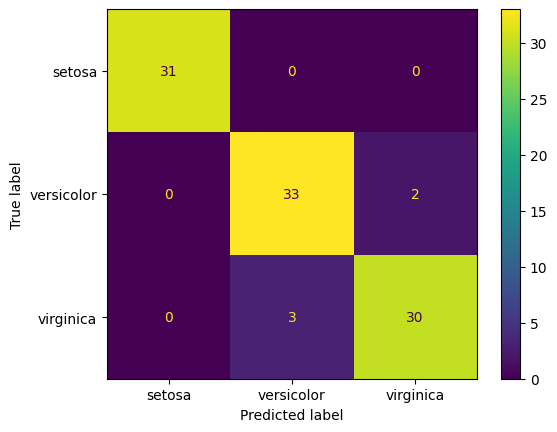

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)

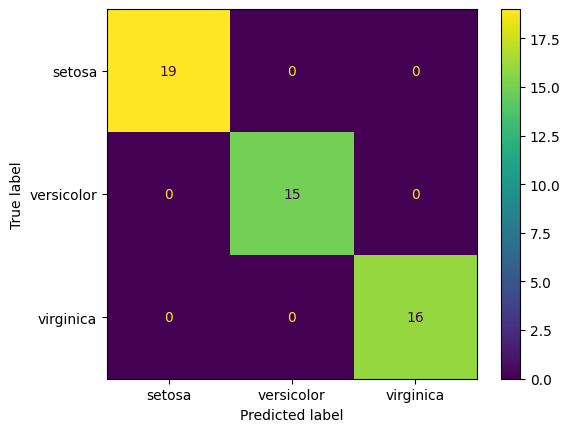

In [40]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

In [41]:
ypred_train = best_knn.predict(xtrain)
ypred_test = best_knn.predict(xtest)

In [42]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [43]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, ypred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.92      0.94      0.93        35
   virginica       0.94      0.91      0.92        33

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [45]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### SVM (Support Vector Machines) 
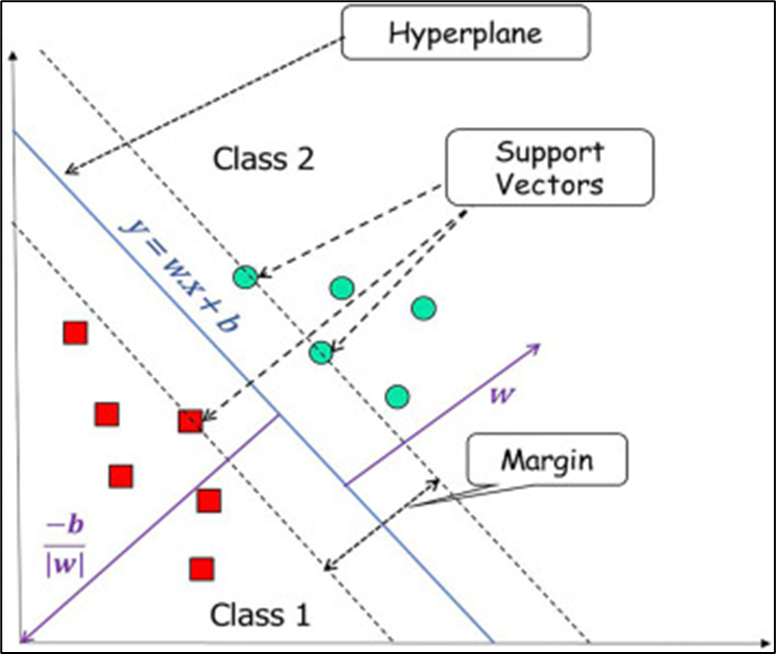

In [46]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(xtrain, ytrain)

SVC(probability=True)

### Evaluate SVM model

In [47]:
svm_model.score(xtrain, ytrain)

0.9595959595959596

In [48]:
svm_model.score(xtest, ytest)

1.0

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95213675, 0.80952381, 0.90277778, 1.        , 0.94747475])

In [50]:
scores.mean()

np.float64(0.9223826173826174)

In [51]:
scores_knn = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring="f1_macro")
scores_knn

array([0.90277778, 0.85641026, 0.90277778, 0.95213675, 0.89166667])

In [52]:
scores_knn.mean()

np.float64(0.9011538461538461)

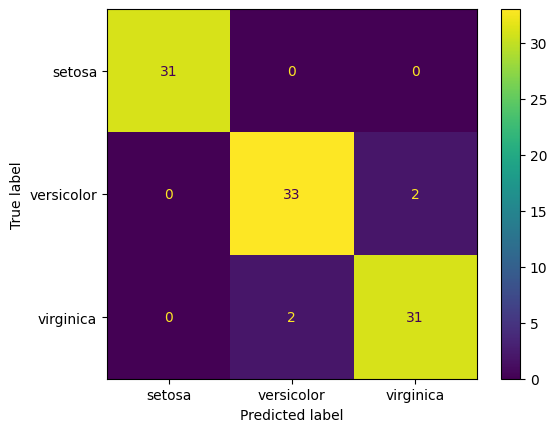

In [53]:
ConfusionMatrixDisplay.from_estimator(svm_model, xtrain, ytrain)

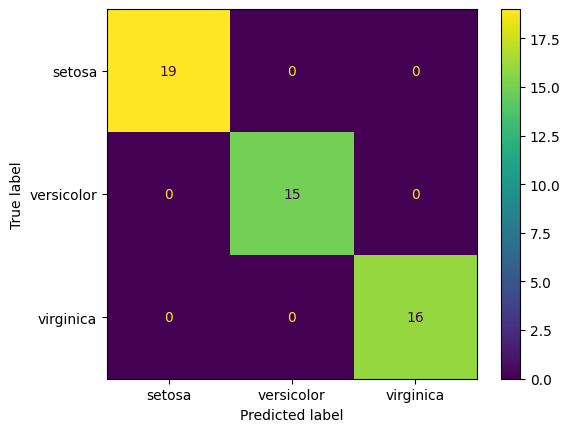

In [54]:
ConfusionMatrixDisplay.from_estimator(svm_model, xtest, ytest)

In [55]:
ypred_test2 = svm_model.predict(xtest)

In [56]:
ypred_test2[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [57]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [58]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Based on cross validated f1 macro SVM has slightly better result of 0.9223 compared to KNN(0.90)

### Hence i will choose SVM for out of sample prediction

### Step 8- Out of sample prediction

In [59]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [61]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [62]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [63]:
preds = svm_model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [64]:
probs = svm_model.predict_proba(xnew_pre)
probs

array([[0.00788599, 0.96567918, 0.02643483],
       [0.01271665, 0.02042234, 0.96686101],
       [0.034052  , 0.94982046, 0.01612753],
       [0.52044719, 0.37292753, 0.10662528],
       [0.01234236, 0.21678397, 0.77087367],
       [0.96248929, 0.01956522, 0.01794548],
       [0.03761267, 0.95176414, 0.01062319],
       [0.00910885, 0.03450033, 0.95639082],
       [0.96876614, 0.01570255, 0.01553131],
       [0.78269571, 0.15199419, 0.06531011],
       [0.01274909, 0.97914183, 0.00810909],
       [0.01319215, 0.97847355, 0.0083343 ],
       [0.02273062, 0.02525023, 0.95201915],
       [0.01982733, 0.7156302 , 0.26454247],
       [0.020771  , 0.50597582, 0.47325318]])

In [65]:
svm_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
xnew["species_pred"] = preds
xnew[svm_model.classes_] = probs

In [68]:
xnew = xnew.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0079,0.9657,0.0264
1,6.9,3.1,5.1,2.3,virginica,0.0127,0.0204,0.9669
2,5.1,2.5,3.0,1.1,versicolor,0.0341,0.9498,0.0161
3,4.4,2.9,NaN,0.2,setosa,0.5204,0.3729,0.1066
4,5.9,3.0,5.1,1.8,virginica,0.0123,0.2168,0.7709
5,5.5,3.5,1.3,0.2,setosa,0.9625,0.0196,0.0179
6,5.6,NaN,3.6,1.3,versicolor,0.0376,0.9518,0.0106
7,6.5,3.0,5.2,2.0,virginica,0.0091,0.0345,0.9564
8,5.3,3.7,1.5,0.2,setosa,0.9688,0.0157,0.0155
9,5.1,3.4,1.5,NaN,setosa,0.7827,0.1520,0.0653


In [69]:
xnew.to_csv("SVMResults.csv", index=False)

In [70]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [72]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [82]:
df.shape

(149, 5)

In [74]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [75]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [76]:
df.index

RangeIndex(start=0, stop=149, step=1)

In [77]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
